In [1]:
## 라이브러리 로딩

import pandas as pd # 판다스 
import numpy as np # 넘파이
import glob # 파일 여러개 불러올 때
import time, datetime
from datetime import datetime

import re # 정규표현식
import csv # 파일로 저장하기 위한 툴

import ast # Abstrac Syntex Tree - 스트링 처리된 리스트를 리스트로 다시 리턴할때
from tqdm import tqdm, trange
from tqdm import tqdm_notebook
from time import sleep

# 토크나이징 라이브러리
import MeCab
m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ko-dic')
from konlpy.tag import Mecab
mecab = Mecab()

In [2]:
df = pd.read_csv("predata.csv", encoding = 'utf8', engine='python')

In [3]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
%%time

tokens_all = []

for i in list(df["contents_all"]):
    k = mecab.nouns(i)
    tokens = []    
    for j in range(len(k)):
        if len(k[j]) > 1:
            tokens.append(k[j])
        else:
            continue
    tokens_all.append(tokens)
    
print(tokens_all[:10])

[['아바투르', '유저', '하나', '아바투르', '유저', '하나', '하나무라', '이것', '자체', '그게', '목적', '아바투르', '화물', '민폐', '대전', '일반', '등급', '고르지', '아바투르', '제한', '해결', '초갈', '상황', '발생', '이건', '아바투르'], ['매칭', '시스템', '생각', '문제', '매칭', '연패', '처사', '며칠', '연승', '건가요', '팀원', '적군', '플레이어', '매칭', '팀원', '적과', '히어로즈', '오브', '스톰', '캐리', '작용', '게임', '플레이어', '경험', '공유', '때문', '혼자', '성장', '캐리', '개념', '혼자', '딴짓', '팀원', '영향', '이야기', '초보자', '팀원', '게임', '게임', '레이팅', '유저', '공평', '처사', '플레이', '팀원', '때문', '연속', '패배', '실망감', '우리', '생각', '매칭', '승부', '승패', '허탈', '승부', '게임', '승부', '조합', '승패', '결정', '게임', '적군', '아군', '초보', '게임', '중국어', '닉네임', '승패', '게임', '제게', '공정', '세계', '아시아', '유저', '게임', '권리', '서로', '실력', '감탄', '승부', '패배', '아군', '책망', '상대', '실력', '감탄', '게임', '지금', '매칭', '시스템', '문제', '여러분', '시행착오', '믿음', '해결책', '모두', '히오스'], ['매칭', '때문', '게임', '강등전', '매칭', '시스템', '동안', '블리자드', '히오스', '사랑', '요즘', '인성', '파탄', '정도', '지경', '매칭', '밸런스', '시스템', '게임', '욕구', '사랑', '올해'], ['아나', '스킨', '관련', '스킨', '살무사', '아나', '수면', '고정', '스킨', '처음', '스킨', '대로', '

In [6]:
tokens_df = pd.DataFrame({"tokens":tokens_all})

In [7]:
# 불용어 제거 함수 정의

def remove_stopwords(text):
    stops = ['같은', '건가요', '겁니다', '것은', '건데', '것입니다','결국','경우','그것','그렇', '그게',
             '그러나', '그런', '그리고', '년도', '대한', '때문', '많은', '말하', '못하', '뭔가',
             '본인', '사실', '생각', '서로', '이거', '이게', '아니', '아무', '어디', '어떤', '언제', '없는', '없습니다',
             '여기', '여러분', '예전', '오늘', '우리', '위한', '위해', '이게', '이런', '이번', '이후,'
             '있는', '있습니다', '자신', '저거', '저번', '정도', '하고', '하는','한다','합니다',
            '누가', '이건', '자체', '건지', '대신', '지금', '그때', '만약', '무엇', '요즘', '완전',
            '녀석', '옛날', '얼마', '뭔가요', '근대', '안녕', '요새', '저기', '나중', '걸로', '이걸','그걸', '당시',
            '건가', '이제', '저건', '보통', '당신', '은근', '등등', '누구', '인데', '당장', '이때', '거기', '여긴',
            '저희', '대체','저게', '뭔지','맞음', '따위', '그거', '그건', '가요', '누군가', '진짜', '이것', '히오스']
    
    # Stopwords 불용어 제거
    meaningful_words = [w for w in text if not w in stops]
    meaningful_list =  ''.join(str(meaningful_words))
    return ast.literal_eval(meaningful_list)

In [8]:
### 워드투벡에 적용할 리스트에 대한 단어들 처리

total = tqdm_notebook(range(153208))

for i in total:
    tokens_df.iloc[i] = remove_stopwords(tokens_df.iloc[i])

In [10]:
word2vec_list = tokens_df["tokens"].values.tolist()

In [11]:
word2vec_list[:10]

[['아바투르',
  '유저',
  '하나',
  '아바투르',
  '유저',
  '하나',
  '하나무라',
  '이것',
  '자체',
  '그게',
  '목적',
  '아바투르',
  '화물',
  '민폐',
  '대전',
  '일반',
  '등급',
  '고르지',
  '아바투르',
  '제한',
  '해결',
  '초갈',
  '상황',
  '발생',
  '이건',
  '아바투르'],
 ['매칭',
  '시스템',
  '생각',
  '문제',
  '매칭',
  '연패',
  '처사',
  '며칠',
  '연승',
  '건가요',
  '팀원',
  '적군',
  '플레이어',
  '매칭',
  '팀원',
  '적과',
  '히어로즈',
  '오브',
  '스톰',
  '캐리',
  '작용',
  '게임',
  '플레이어',
  '경험',
  '공유',
  '때문',
  '혼자',
  '성장',
  '캐리',
  '개념',
  '혼자',
  '딴짓',
  '팀원',
  '영향',
  '이야기',
  '초보자',
  '팀원',
  '게임',
  '게임',
  '레이팅',
  '유저',
  '공평',
  '처사',
  '플레이',
  '팀원',
  '때문',
  '연속',
  '패배',
  '실망감',
  '우리',
  '생각',
  '매칭',
  '승부',
  '승패',
  '허탈',
  '승부',
  '게임',
  '승부',
  '조합',
  '승패',
  '결정',
  '게임',
  '적군',
  '아군',
  '초보',
  '게임',
  '중국어',
  '닉네임',
  '승패',
  '게임',
  '제게',
  '공정',
  '세계',
  '아시아',
  '유저',
  '게임',
  '권리',
  '서로',
  '실력',
  '감탄',
  '승부',
  '패배',
  '아군',
  '책망',
  '상대',
  '실력',
  '감탄',
  '게임',
  '지금',
  '매칭',
  '시스템',
  '문제',
  '여러분',
  '시행착오',
  '믿음'

In [12]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(word2vec_list, min_count=5, size = 100, window=5, sg=1)

model.init_sims()

2018-10-22 18:03:24,192 : INFO : 'pattern' package not found; tag filters are not available for English
2018-10-22 18:03:24,197 : INFO : collecting all words and their counts
2018-10-22 18:03:24,199 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-22 18:03:24,286 : INFO : PROGRESS: at sentence #10000, processed 252334 words, keeping 12648 word types
2018-10-22 18:03:24,335 : INFO : PROGRESS: at sentence #20000, processed 393705 words, keeping 17614 word types
2018-10-22 18:03:24,380 : INFO : PROGRESS: at sentence #30000, processed 515870 words, keeping 21346 word types
2018-10-22 18:03:24,430 : INFO : PROGRESS: at sentence #40000, processed 645930 words, keeping 24164 word types
2018-10-22 18:03:24,470 : INFO : PROGRESS: at sentence #50000, processed 769228 words, keeping 26579 word types
2018-10-22 18:03:24,521 : INFO : PROGRESS: at sentence #60000, processed 885513 words, keeping 28552 word types
2018-10-22 18:03:24,574 : INFO : PROGRESS: at sentence

In [23]:
model_name = 'gamewords'
model.save(model_name)

2018-10-22 18:30:27,755 : INFO : saving Word2Vec object under gamewords, separately None
2018-10-22 18:30:27,759 : INFO : not storing attribute syn0norm
2018-10-22 18:30:27,762 : INFO : not storing attribute cum_table
2018-10-22 18:30:28,248 : INFO : saved gamewords


In [24]:
# 단어 사전 수
len(model.wv.vocab)

16511

In [31]:
model.wv.most_similar('매칭')

[('알고리즘', 0.7148514986038208),
 ('꼼수', 0.6999916434288025),
 ('큐나', 0.6958930492401123),
 ('형평', 0.6859614849090576),
 ('영리', 0.6805075407028198),
 ('이따위', 0.6791557669639587),
 ('엠알', 0.6782368421554565),
 ('족망', 0.6746553182601929),
 ('매치', 0.6723212003707886),
 ('불공정', 0.6675049066543579)]

In [119]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')


# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'gamewords'
model = g.Doc2Vec.load(model_name)

2018-10-22 15:22:19,020 : INFO : loading Doc2Vec object from gamewords
2018-10-22 15:22:19,147 : INFO : loading wv recursively from gamewords.wv.* with mmap=None
2018-10-22 15:22:19,148 : INFO : setting ignored attribute syn0norm to None
2018-10-22 15:22:19,150 : INFO : setting ignored attribute cum_table to None
2018-10-22 15:22:19,152 : INFO : loaded gamewords


In [5]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X)

NameError: name 'model' is not defined

In [121]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [112]:
df.head(20)

,x,y
입각,122.035249,-63.083281
잉어,-95.327656,-56.635913
프린트,-65.181519,-11.265919
커드,-80.479386,304.645109
잡지,63.532966,36.930561
악화,15.213399,-69.567375
설상가상,41.184219,68.891160
두려움,7.519320,-30.389252
천민,-3.309290,45.189809
페페,41.267281,-16.557135


In [122]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

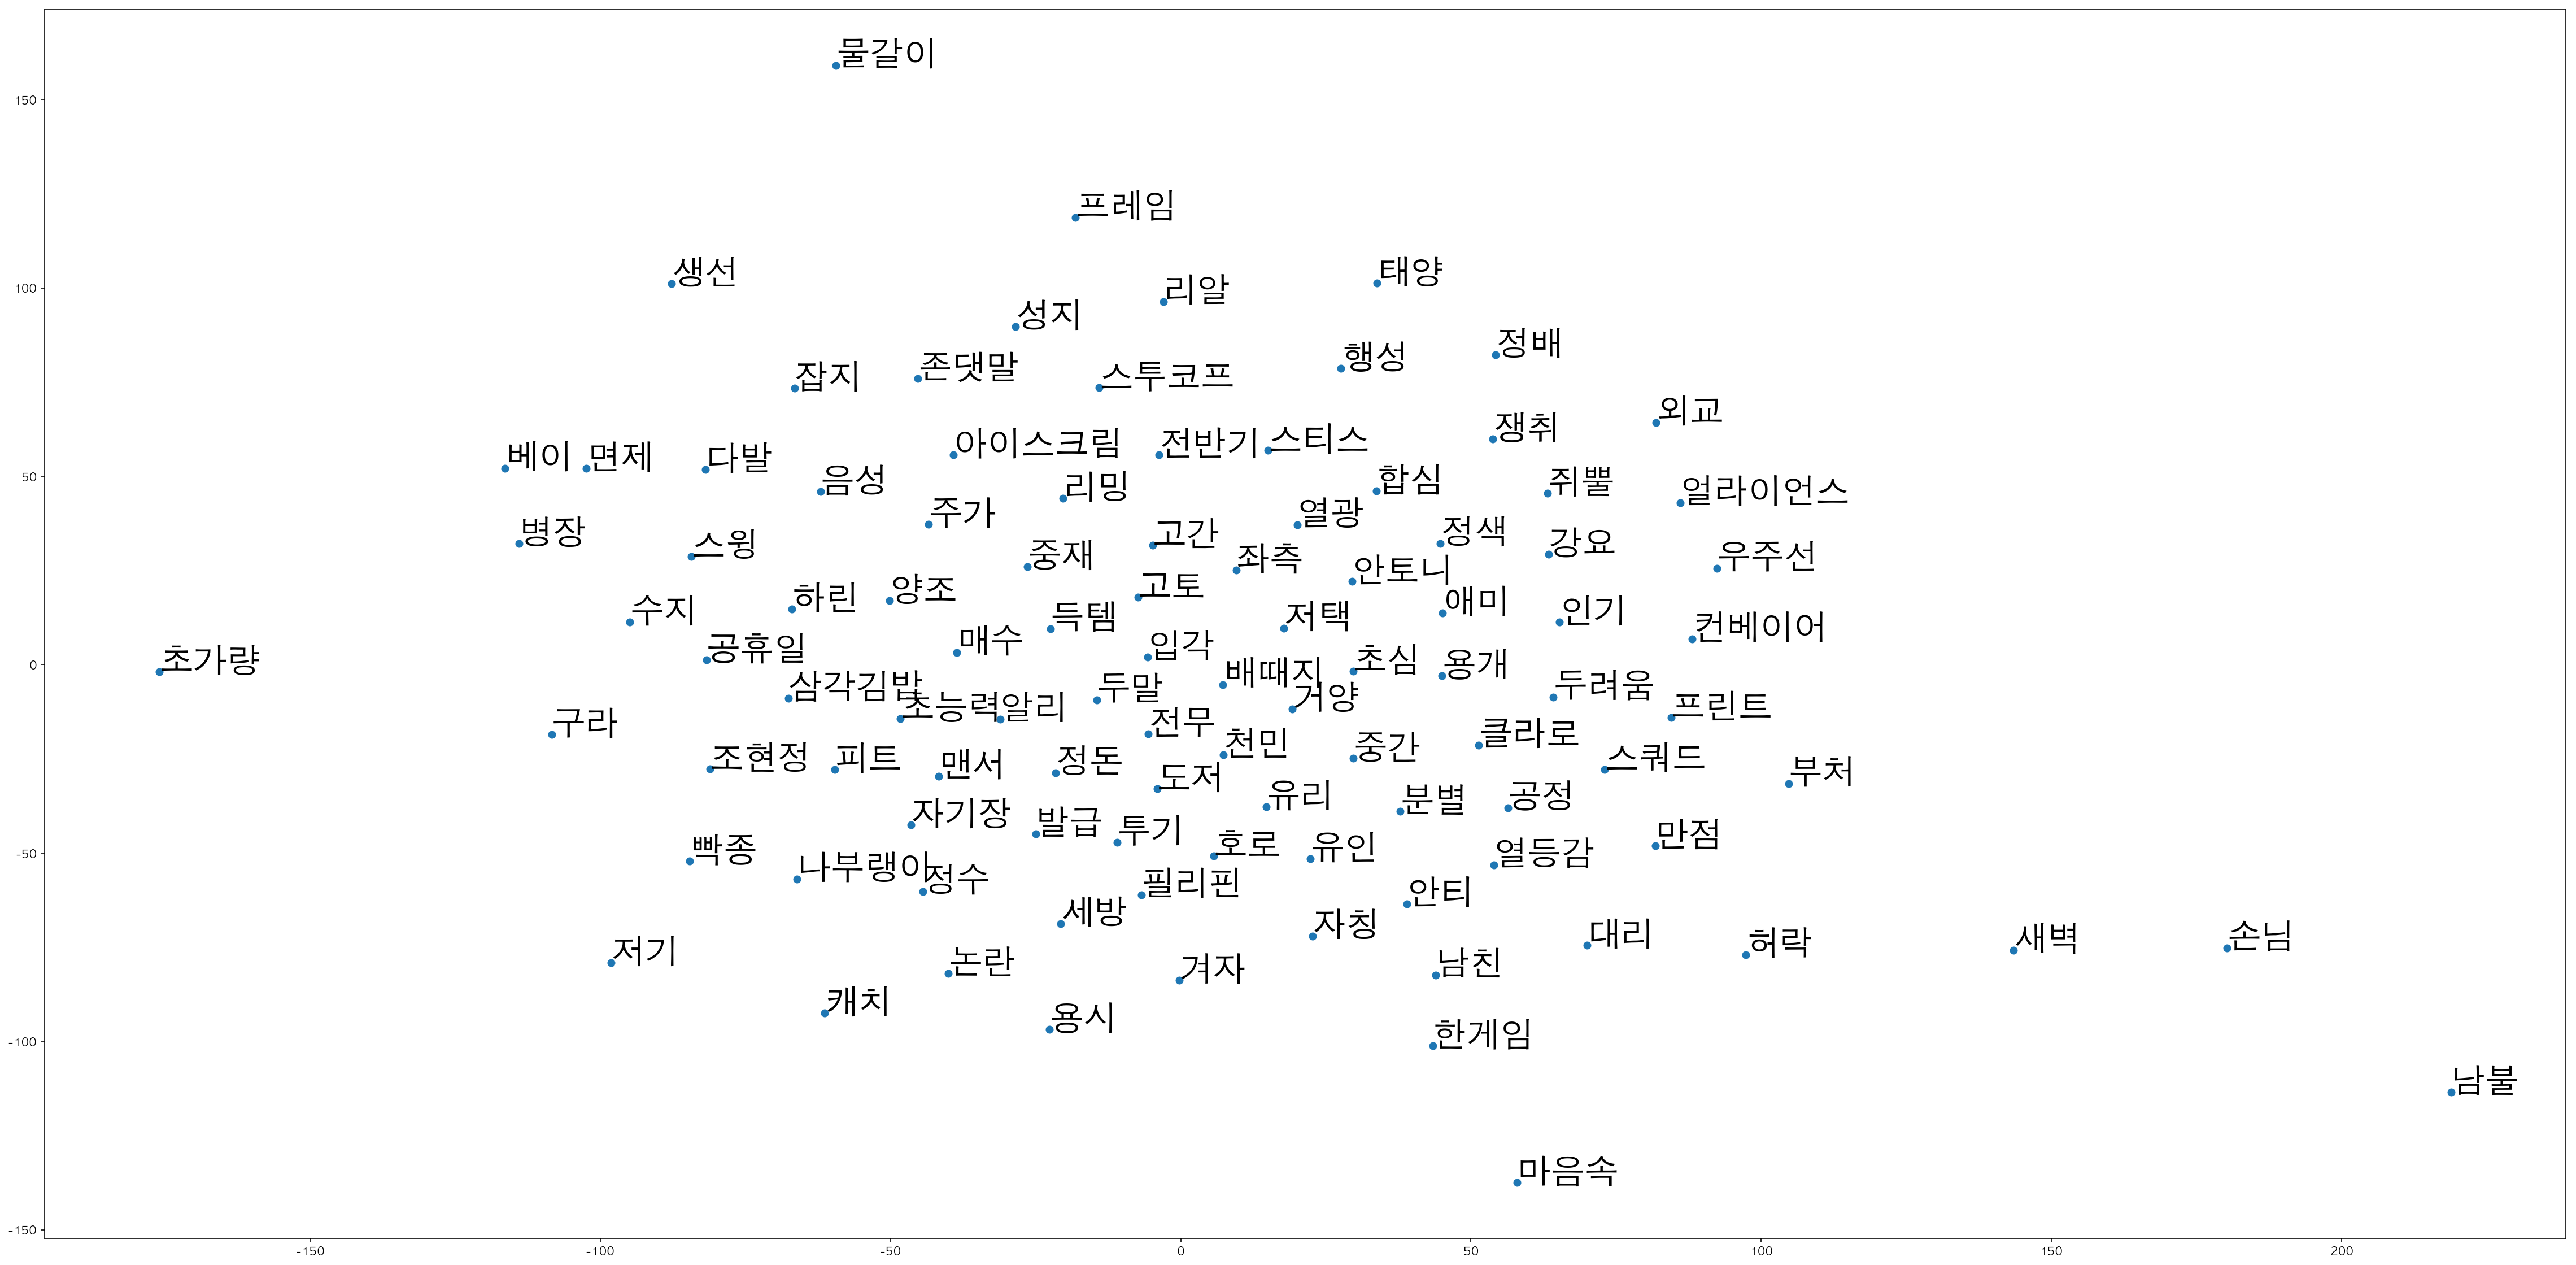

In [123]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()